In [1]:
from datascience import *
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [12]:
#salary data for 2013 - 2019
nba13to19 = Table.read_table('datasets/nba_salaries_13_19.csv')
#salary data for 2016
nba16 = Table.read_table('datasets/nba2016_salary.csv')

In [13]:
#second dataset
nba16

id,player,position,team,salary
1,Kobe Bryant,SF,Los Angeles Lakers,25
2,Joe Johnson,SF,Brooklyn Nets,24.8949
3,LeBron James,SF,Cleveland Cavaliers,22.9705
4,Carmelo Anthony,SF,New York Knicks,22.875
5,Dwight Howard,C,Houston Rockets,22.3594
6,Chris Bosh,PF,Miami Heat,22.1927
7,Chris Paul,PG,Los Angeles Clippers,21.4687
8,Kevin Durant,SF,Oklahoma City Thunder,20.1586
9,Derrick Rose,PG,Chicago Bulls,20.0931
10,Dwyane Wade,SG,Miami Heat,20


### Questions

1. How many players does each team have per position in this dataset?
2. Using your answer above or otherwise what is the total number of players per team? Choose an appropriate visualization to illustrate your findings.
3. How much does the best-paid player earn for every position in each team?
4. Using the nba13to19 table, find which agent made the most money on average for his players in the 2016 season. Make sure to include a column with the number of players each agent managed.
5. Using the above table you made, investigate whether the number of players the agent manages affects his ranking.

In [29]:
nba13to19

player,season,season_name,salary,agency,agent,salary_amnesty,league,team,player_off_roster_13_14,id_contract_type
Al Jefferson,2014,2013-2014,13500000,Excel Sports Management,Jeff Schwartz,False,nba,Bobcats,False,G
Al Jefferson,2015,2014-2015,13500000,Excel Sports Management,Jeff Schwartz,False,nba,Bobcats,False,G
Al Jefferson,2016,2015-2016,13500000,Excel Sports Management,Jeff Schwartz,False,nba,Bobcats,False,PO
Anthony Tolliver,2014,2013-2014,884293,Lee Basketball Services LTD,Larry Fox,False,nba,Bobcats,False,G
Ben Gordon,2014,2013-2014,13200000,IAM Sports,Raymond Brothers,False,nba,Bobcats,False,G
Bismack Biyombo,2014,2013-2014,3049920,Wasserman Media Group,Arn Tellem,False,nba,Bobcats,False,G
Bismack Biyombo,2015,2014-2015,3873398,Wasserman Media Group,Arn Tellem,False,nba,Bobcats,False,TO
Bismack Biyombo,2016,2015-2016,5194227,Wasserman Media Group,Arn Tellem,False,nba,Bobcats,False,QO
Brendan Haywood,2014,2013-2014,2050000,ASM Sports,Andy Miller,False,nba,Bobcats,False,G
Brendan Haywood,2015,2014-2015,2213688,ASM Sports,Andy Miller,False,nba,Bobcats,False,G


In [27]:
nba16

id,player,position,team,salary
1,Kobe Bryant,SF,Los Angeles Lakers,25
2,Joe Johnson,SF,Brooklyn Nets,24.8949
3,LeBron James,SF,Cleveland Cavaliers,22.9705
4,Carmelo Anthony,SF,New York Knicks,22.875
5,Dwight Howard,C,Houston Rockets,22.3594
6,Chris Bosh,PF,Miami Heat,22.1927
7,Chris Paul,PG,Los Angeles Clippers,21.4687
8,Kevin Durant,SF,Oklahoma City Thunder,20.1586
9,Derrick Rose,PG,Chicago Bulls,20.0931
10,Dwyane Wade,SG,Miami Heat,20


In [28]:
nba13to19.join("player", nba16, "name")

player,season,season_name,salary,agency,agent,salary_amnesty,league,team,player_off_roster_13_14,id_contract_type,id,position,team_2,salary_2
Aaron Brooks,2014,2013-2014,674194,Creative Artists Agency,Leon Rose,False,nba,Kings,True,G,249,PG,Chicago Bulls,2.25
Aaron Brooks,2014,2013-2014,884293,Creative Artists Agency,Leon Rose,False,nba,Rockets,False,G,249,PG,Chicago Bulls,2.25
Al Horford,2014,2013-2014,12000000,Wasserman Media Group,Arn Tellem,False,nba,Hawks,False,G,55,C,Atlanta Hawks,12
Al Horford,2015,2014-2015,12000000,Wasserman Media Group,Arn Tellem,False,nba,Hawks,False,G,55,C,Atlanta Hawks,12
Al Horford,2016,2015-2016,12000000,Wasserman Media Group,Arn Tellem,False,nba,Hawks,False,G,55,C,Atlanta Hawks,12
Al Jefferson,2014,2013-2014,13500000,Excel Sports Management,Jeff Schwartz,False,nba,Bobcats,False,G,40,C,Charlotte Hornets,13.5
Al Jefferson,2015,2014-2015,13500000,Excel Sports Management,Jeff Schwartz,False,nba,Bobcats,False,G,40,C,Charlotte Hornets,13.5
Al Jefferson,2016,2015-2016,13500000,Excel Sports Management,Jeff Schwartz,False,nba,Bobcats,False,PO,40,C,Charlotte Hornets,13.5
Al-Farouq Aminu,2014,2013-2014,3749602,IAM Sports,Raymond Brothers,False,nba,Pelicans,False,G,87,SF,Portland Trail Blazers,8.04289
Alan Anderson,2014,2013-2014,947907,Priority Sports & Entertainment,Mark Bartelstein,False,nba,Nets,False,G,171,SG,Washington Wizards,4


In [24]:
#1
nba16.pivot("team", "position","salary", np.mean)
nba16.groups(["team", "position"], np.mean)

team,position,id mean,player mean,salary mean
Atlanta Hawks,C,159.667,,7.58542
Atlanta Hawks,PF,106,,11.0025
Atlanta Hawks,PG,184,,4.8817
Atlanta Hawks,SF,222.5,,3
Atlanta Hawks,SG,319.8,,1.80969
Boston Celtics,C,239.667,,2.45046
Boston Celtics,PF,235.5,,3.08548
Boston Celtics,PG,166.5,,4.97465
Boston Celtics,SF,187,,4.41716
Boston Celtics,SG,270.75,,2.00755


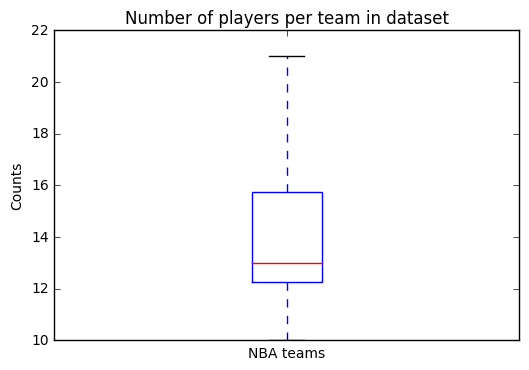

In [5]:
#2
nba_by_team = nba16.group('team')
plt.boxplot(nba_by_team.column('count'))
plt.title("Number of players per team in dataset")
plt.xticks([1], ['NBA teams'])
plt.ylabel("Counts")

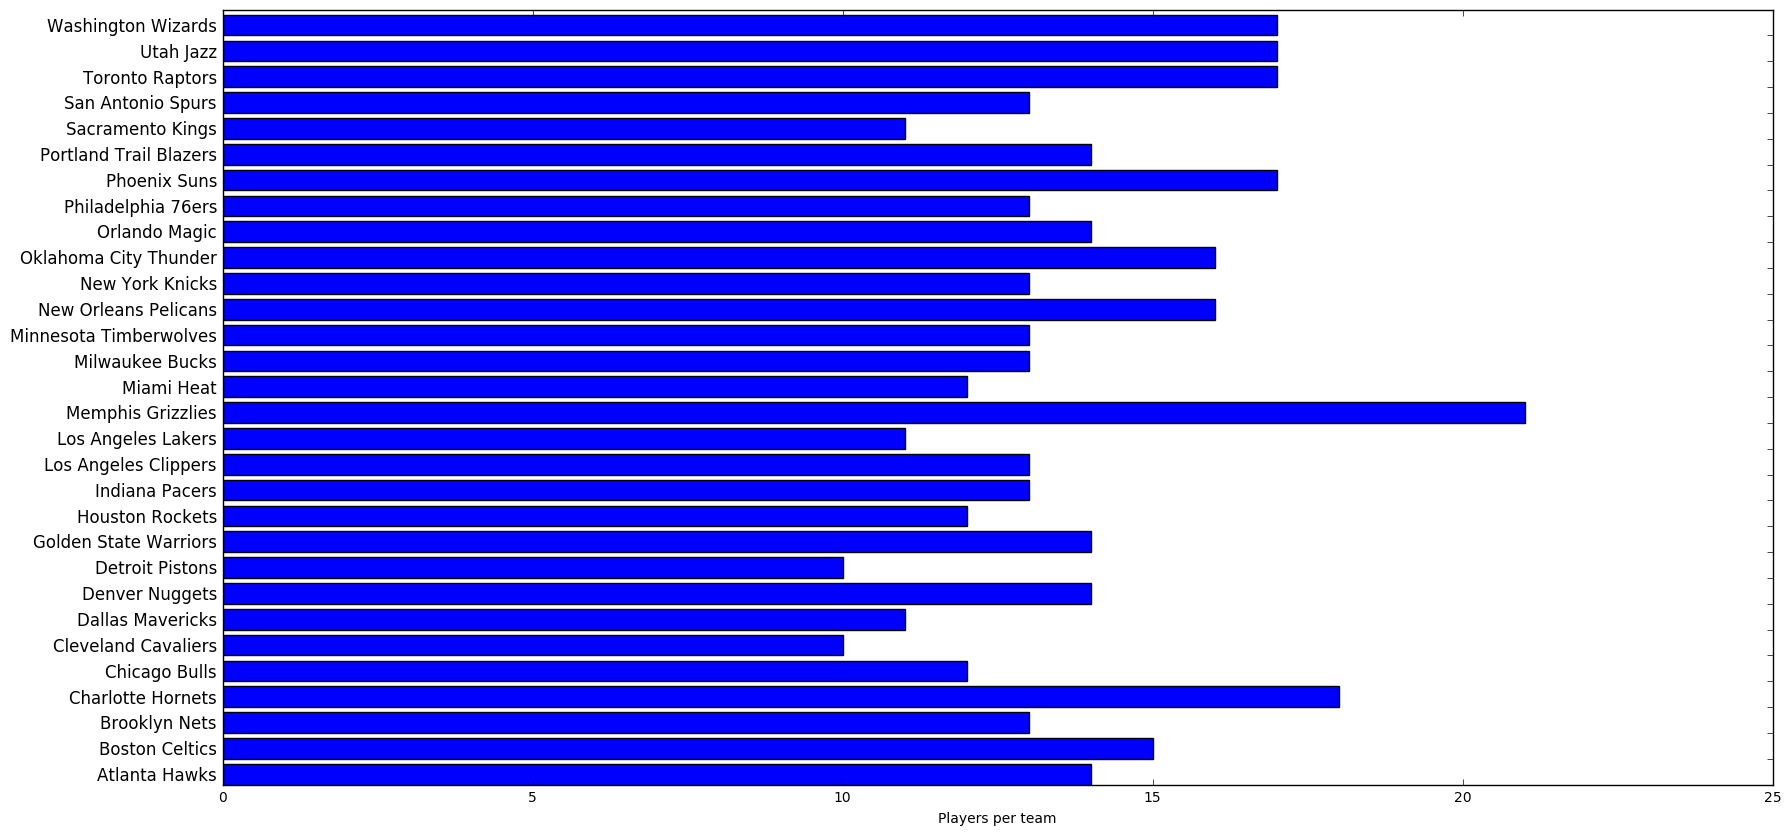

In [6]:
plt.figure(figsize=(20,10))
plt.barh(np.arange(nba_by_team.num_rows),nba_by_team.column('count'))
plt.yticks(np.arange(nba_by_team.num_rows),nba_by_team.column('team'), verticalalignment='bottom',fontsize='large')
plt.xlabel("Players per team")
plt.show()

In [7]:
#3
nba16.groups(['team', 'position'], max).drop(["player max", "id max"])

team,position,salary max
Atlanta Hawks,C,12
Atlanta Hawks,PF,18.6717
Atlanta Hawks,PG,8
Atlanta Hawks,SF,4
Atlanta Hawks,SG,5.74648
Boston Celtics,C,2.61698
Boston Celtics,PF,5
Boston Celtics,PG,7.73034
Boston Celtics,SF,6.79612
Boston Celtics,SG,3.42551


In [8]:
#4
nba16 = nba13to19.where("season", 2016)
agent_salary = nba16.group("agent", np.mean).select(["agent", "salary mean"])
agent_count = nba16.group("agent")
agent = agent_salary.join("agent", agent_count).sort("salary mean", descending=True)
agent

agent,salary mean,count
Juan Perez,2.01586e+07,1
Henry Thomas,1.57207e+07,3
Wallace Prather,1.35e+07,1
Rich Paul,1.06417e+07,3
Mike Conley,9.98843e+06,1
Rob Pelinka,9.71997e+06,8
Bill Neff,8e+06,1
Dan Fegan,7.74055e+06,14
Max Ergul,7.47141e+06,1
Jeff Austin,7.44468e+06,5


In [9]:
#5
agent = agent.with_column("salary_ranking", np.arange(1, agent.num_rows+1))
agent

agent,salary mean,count,salary_ranking
Juan Perez,2.01586e+07,1,1
Henry Thomas,1.57207e+07,3,2
Wallace Prather,1.35e+07,1,3
Rich Paul,1.06417e+07,3,4
Mike Conley,9.98843e+06,1,5
Rob Pelinka,9.71997e+06,8,6
Bill Neff,8e+06,1,7
Dan Fegan,7.74055e+06,14,8
Max Ergul,7.47141e+06,1,9
Jeff Austin,7.44468e+06,5,10


In [10]:
agent.sort("count", descending=True)

agent,salary mean,count,salary_ranking
Arn Tellem,7.09468e+06,25,12
Jeff Schwartz,7.23491e+06,20,11
Andy Miller,4.99468e+06,15,21
Mark Bartelstein,4.57187e+06,14,24
Dan Fegan,7.74055e+06,14,8
Bill Duffy,3.23522e+06,12,30
Rob Pelinka,9.71997e+06,8,6
Leon Rose,6.68174e+06,7,14
David Falk,6.95141e+06,5,13
Jeff Austin,7.44468e+06,5,10
